In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    """
    Calculate the Black-Scholes price of a European call option.
    
    Parameters:
    S : float : Current stock price
    K : float : Option strike price
    T : float : Time to expiration (in years)
    r : float : Risk-free interest rate (as a decimal)
    sigma : float : Volatility of the stock (as a decimal)
    
    Returns:
    float : Call option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def main():
    # Example parameters
    S = 100  # Current stock price
    K = 100  # Option strike price
    T = 1    # Time to expiration (1 year)
    r = 0.05 # Risk-free interest rate
    sigma = 0.2 # Volatility

    call_price = black_scholes_call(S, K, T, r, sigma)
    print(f"The call option price is: ${call_price:.2f}")

if __name__ == "__main__":
    main()


The call option price is: $10.45


In [7]:
import yfinance as yf
import numpy as np
from datetime import datetime

# Fetch stock data
stock_symbol = "NVDA"
stock_data = yf.Ticker(stock_symbol)
S = stock_data.history(period="1d")['Close'][0]  # Current stock price

# Example strike price 
K = 125  # Replace with actual strike price

# Calculate time to expiration
expiration_date = datetime(2024, 11, 30)  # Example expiration date
today = datetime.today()
T = (expiration_date - today).days / 365  # Time in years

# Risk-free interest rate (using an example value, e.g., 5% from U.S. Treasury)
r = 0.05  # 

# Calculate historical volatility
historical_data = stock_data.history(period="1y")['Close']
log_returns = np.log(historical_data / historical_data.shift(1))
sigma = log_returns.std() * np.sqrt(252)  # Annualize the volatility

# Print the parameters
print(f"Current Stock Price (S): {S}")
print(f"Option Strike Price (K): {K}")
print(f"Time to Expiration (T): {T}")
print(f"Risk-Free Interest Rate (r): {r}")
print(f"Volatility (σ): {sigma}")


Current Stock Price (S): 132.44000244140625
Option Strike Price (K): 125
Time to Expiration (T): 0.136986301369863
Risk-Free Interest Rate (r): 0.05
Volatility (σ): 0.5159657285837116


C:\Users\HP\AppData\Local\Temp\ipykernel_15776\3362275383.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S = stock_data.history(period="1d")['Close'][0]  # Current stock price


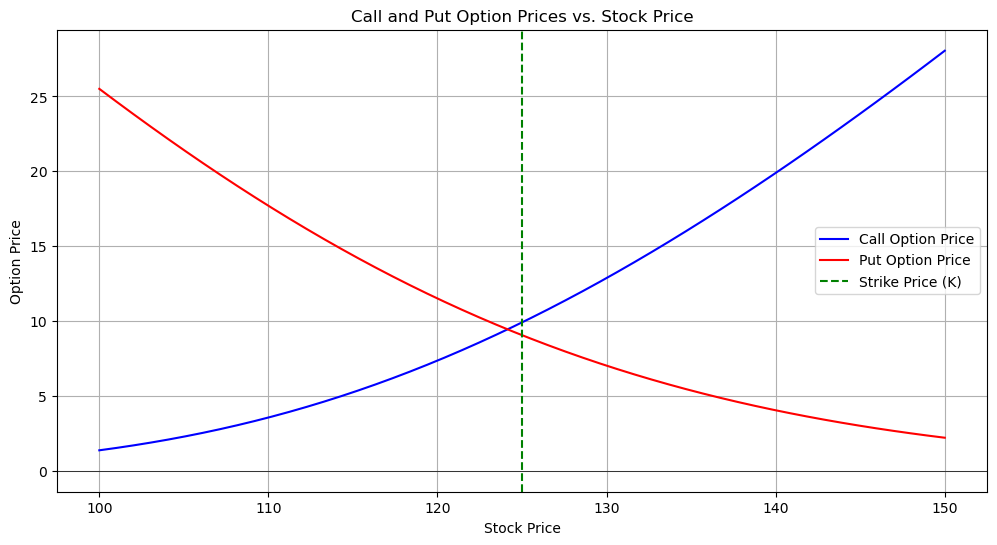

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si

# Black-Scholes option pricing function
def black_scholes(S, K, T, r, sigma, option_type='call'):
    """Calculate the Black-Scholes option pricing formula."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = (S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2))
    elif option_type == 'put':
        option_price = (K * np.exp(-r * T) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1))
    else:
        raise ValueError("option_type must be either 'call' or 'put'")
    
    return option_price

# Visualization of option prices
prices = np.linspace(100, 150, 50)  # Range of stock prices
call_prices = [black_scholes(price, K, T, r, sigma, option_type='call') for price in prices]
put_prices = [black_scholes(price, K, T, r, sigma, option_type='put') for price in prices]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(prices, call_prices, label='Call Option Price', color='blue')
plt.plot(prices, put_prices, label='Put Option Price', color='red')
plt.axhline(y=0, color='black', lw=0.5)
plt.axvline(x=K, color='green', linestyle='--', label='Strike Price (K)')
plt.title('Call and Put Option Prices vs. Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.legend()
plt.grid()
plt.show()
